#Steps to follow:

1. Initializze weights and bias to 0. Define Sigmoid or logisitic function
2. Write the loss function i.e. cross-entropy or logisitic loss function
3. Write the gradient descent function 
4. Update the weight and bias




#Cross-entropy loss function

Loss functions are implemented to model accuracy and for better optimization of the machine learning model. A loss function operates on the error to quantify how bad it is to get an error of a particular size/direction, which is affected by the negative consequences that result in an incorrect prediction.
 the entropy of a random variable is the average level of “information,” “surprise,” or “uncertainty” inherent in the variable’s possible outcomes.

*   Cross entrtopy is the measure of the difference between two probability distributions for a given random variable or set of events
*   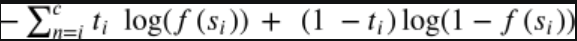

where Si  - inputs/weights,
f -  the activation function in this case, 
t - the target predictions,
i  - the class to predict.




#Gradient Descent





*   It is an optimization algorithm that helps models find the optimal set of parameters by iteratively adjusting them in the opposite direction of the gradient.
*   Here we would need cost function, that measures the performance of a model for any given data and basically quantifies the error between predicted values and expected values and presents it in the form of a single real number.
*   The goal is to reduce the cost function by modifying the parameters using the gradient descent algorithm.
*The gradient is the slope of the cost function, and by moving in the direction of the negative gradient, the algorithm can converge to the optimal set of parameters that best fits the training data.




In [125]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



In [126]:
class LogisticRegression:
  def __init__(self, learning_rate=0.001, n_iters=1000):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self,X,y):
     n_samples, n_features = X.shape
    # init parameters
     self.weights = np.zeros(n_features)
     self.bias = 0  

     for _ in range(self.n_iters):
            # approximate y with linear combination of X.w + b
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
  def predict(self, X):
    linear_model = np.dot(X, self.weights) + self.bias
    y_predicted = self._sigmoid(linear_model)
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
    return np.array(y_predicted_cls)

  # def _sigmoid(self, x):
  #   return 1 / (1 + np.exp(-x))

  def _sigmoid(self, x):
    return np.array([self._sigmoid_function(value) for value in x])

  def _sigmoid_function(self, x):
      if x >= 0:
          z = np.exp(-x)
          return 1 / (1 + z)
      else:
          z = np.exp(x)
          return z / (1 + z)  

In [127]:
data = pd.read_csv('framingham.csv')
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [128]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [129]:
data.dropna(inplace=True)
data.reset_index(inplace=True)

In [130]:
X1 = data.drop('TenYearCHD', axis=1)

In [131]:
data1 = data.iloc[:, [0,1,2,3,8,10,11,12,13]]
data1.reset_index(inplace=True) 
X = data1
X

,level_0,index,male,age,education,prevalentHyp,totChol,sysBP,diaBP,BMI
0,0,0,1,39,4.0,0,195.0,106.0,70.0,26.97
1,1,1,0,46,2.0,0,250.0,121.0,81.0,28.73
2,2,2,1,48,1.0,0,245.0,127.5,80.0,25.34
3,3,3,0,61,3.0,1,225.0,150.0,95.0,28.58
4,4,4,0,46,3.0,0,285.0,130.0,84.0,23.10
...,...,...,...,...,...,...,...,...,...,...
3651,3651,4231,1,58,3.0,1,187.0,141.0,81.0,24.96
3652,3652,4232,1,68,1.0,1,176.0,168.0,97.0,23.14
3653,3653,4233,1,50,1.0,1,313.0,179.0,92.0,25.97
3654,3654,4234,1,51,3.0,0,207.0,126.5,80.0,19.71


In [140]:
y = data['TenYearCHD']
y1 = data['TenYearCHD']
y

0       0
1       0
2       0
3       1
4       0
       ..
3651    0
3652    1
3653    1
3654    0
3655    0
Name: TenYearCHD, Length: 3656, dtype: int64

In [133]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=42)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

In [142]:
clf = LogisticRegression(learning_rate=0.01)
clf.fit(X_train,y_train)
clf.fit(X_train1, y_train1)

In [145]:
# y_pred = clf.predict(X_test)
y_pred1 = clf.predict(X_test1)

In [137]:
accuracy_score(y_test1,y_pred1)

0.8319672131147541

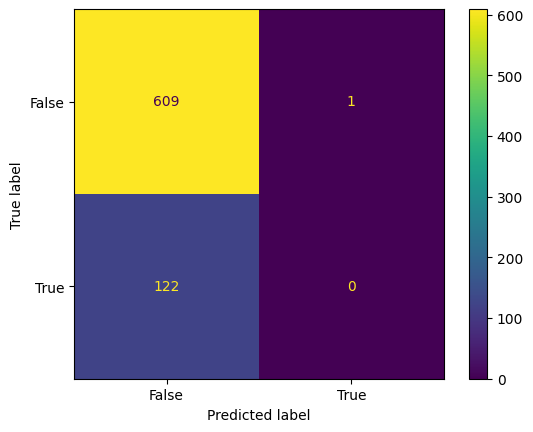

In [138]:
confusion_matrix = confusion_matrix(y_test1, y_pred1)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

<Axes: >

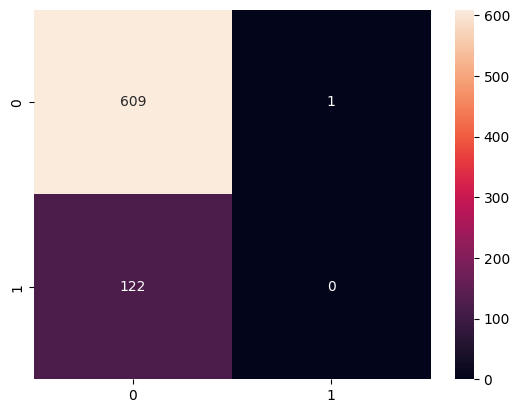

In [139]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, fmt ='')